Emotions Recognition from Text with LinearSVC

https://www.kaggle.com/code/rizkyalifr/emotions-recognition-from-text-with-linearsvc

In [1]:
!pip install xgboost

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

import pandas as pd
import pandas as pd
import numpy as np
import re 
import nltk 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [3]:
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [4]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import matplotlib.patches as mpatches

In [5]:
df_train = pd.read_csv("train.txt", delimiter=';', header=None, names=['sentence','label'])
df_test = pd.read_csv("test.txt", delimiter=';', header=None, names=['sentence','label'])
df_val = pd.read_csv("val.txt", delimiter=';', header=None, names=['sentence','label'])

In [6]:
frames = [df_train, df_val]
df = pd.concat(frames)
df = df.reset_index()
df = df.drop(columns = "index")

In [7]:
df

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy


In [8]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(df)

,Total,Percent
sentence,0,0.0
label,0,0.0


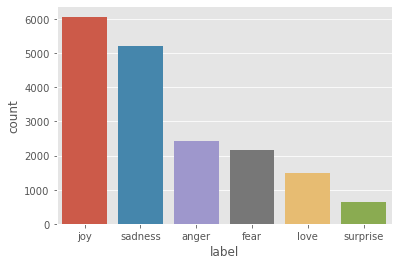

In [9]:
#Melihat Sebaran Label
import seaborn as sns
sns.countplot(x ='label', data = df,order = df["label"].value_counts().index)
 
# Show the plot
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['label_enc'] = labelencoder.fit_transform(df['label'])
df_test['label_enc'] = labelencoder.transform(df_test['label'])

In [11]:
map = df[['label','label_enc']].drop_duplicates(keep='first')
map

,label,label_enc
0,sadness,4
2,anger,0
3,love,3
6,surprise,5
7,fear,1
8,joy,2


In [12]:
def relabel(a) :
    if a == 4 :
        o = "sadness"
    elif a == 0 :
        o = "anger"
    elif a == 3 :
        o = "love"
    elif a == 5 :
        o = "surprise"
    elif a == 1 :
        o = "fear"
    else :
        o = "joy"
    return o

In [13]:
df_test[['label','label_enc']].drop_duplicates(keep='first')

,label,label_enc
0,sadness,4
3,joy,2
5,fear,1
6,anger,0
14,love,3
65,surprise,5


In [14]:
 import nltk
 nltk.download('punkt')
 from nltk.stem.porter import PorterStemmer
 from nltk.tokenize.treebank import TreebankWordDetokenizer

 porter_stemmer = PorterStemmer()    

 sentence_stemm_train = []
 for i in range(df.shape[0]):
     word_data = df.sentence[i]
     nltk_tokens = nltk.word_tokenize(word_data)
     word=[]
     for w in nltk_tokens:
         word.append(porter_stemmer.stem(w))
     sentence = TreebankWordDetokenizer().detokenize(word)
     sentence_stemm_train.append(sentence)

 sentence_stemm_test = []
 for i in range(df_test.shape[0]):
     word_data = df_test.sentence[i]
     nltk_tokens = nltk.word_tokenize(word_data)
     word=[]
     for w in nltk_tokens:
         word.append(porter_stemmer.stem(w))
     sentence = TreebankWordDetokenizer().detokenize(word)
     sentence_stemm_test.append(sentence)

 df["sentence_stemm"] = np.array(sentence_stemm_train)
 df_test["sentence_stemm"] = np.array(sentence_stemm_test)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GK999CK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, stop_words='english')

# We transform each text into a vector
features_train = tfidf.fit_transform(df.sentence).toarray()
features_test = tfidf.transform(df_test.sentence).toarray()

features_train_name = tfidf.get_feature_names()

labels = df.label_enc

print("Jumlah Feature Setelah di Ekstrak : "+str(features_train.shape[1]))

Jumlah Feature Setelah di Ekstrak : 3398


C:\Users\GK999CK\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
feature_train_df = pd.DataFrame(data=features_train,    # values,    # 1st column as index
                                columns=features_train_name)  # 1st row as the column names

In [17]:
# Emotions Recognition from Text with LinearSVC


In [18]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#mencoba beberapa algoritma machine learning

# models = [
#     RandomForestClassifier,
#     LinearSVC(),
#     MultinomialNB(),XGBClassifier()
# ]

models = [LinearSVC()]

# 5 Cross-validation
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features_train, labels, scoring='f1_macro', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'f1_macro'])

In [19]:
mean_f1 = cv_df.groupby('model_name').f1_macro.mean()
std_f1 = cv_df.groupby('model_name').f1_macro.std()

f1 = pd.concat([mean_f1, std_f1], axis= 1, 
          ignore_index=True)
f1.columns = ['Mean F1_Macro', 'Standard deviation']
f1

,Mean F1_Macro,Standard deviation
model_name,,
LinearSVC,0.856706,0.008168


In [20]:
model = LinearSVC()
model.fit(features_train, labels)
y_pred = model.predict(features_test)

In [21]:
pred_cat = []
for i in y_pred:
  cat = relabel(i)
  pred_cat.append(cat)
pred_cat = np.array(pred_cat)

In [22]:
print(classification_report(df_test.label, pred_cat))

              precision    recall  f1-score   support

       anger       0.87      0.88      0.88       275
        fear       0.88      0.86      0.87       224
         joy       0.90      0.92      0.91       695
        love       0.75      0.75      0.75       159
     sadness       0.93      0.92      0.92       581
    surprise       0.74      0.68      0.71        66

    accuracy                           0.89      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.89      0.89      0.89      2000



In [23]:
def predict_emotion(text):
    x = tfidf.transform([text]).toarray()
    pred = relabel(model.predict(x))
    return pred

In [29]:
text = "i feeling anxious today"
predict_emotion(text)

'fear'

In [30]:
#New dataset in which predict emotions
EmotionPredictions = pd.read_csv('SampleSentimentCompanyReviews.csv')
text = EmotionPredictions
predict_emotion(text)

AttributeError: 'DataFrame' object has no attribute 'lower'